<a id="1"></a>
# <div style="text-align:center; padding:20px 40px; color:white; margin:0; font-size:35px; font-family:Serif; display:fill; border-radius:15px; background-color:#DB9700; box-sizing: border-box;"><b>☺️World Happiness Prediction 📈 & Machine Learning Models 🧠☺️</b></div>



## World Happiness EDA 📊 

Welcome to this Notebook! Here you will find the Exploitative Data Analysis (AED/EDA) carried out on the CSV's that contain information on world happiness during the years (2015 - 2019). In this EDA, the readings of the CSV's will be carried out to fully understand the information presented by each set of data, the type of data that each one stores, null values ​​and duplicates will be verified. Additionally, some transformations were carried out in order to standardize the name of the columns to be able to adequately concatenate the CSV's and finally, adjust and implement linear regression models in order to predict the happiness score from the selected features.

#### Import Modules and Packages
In this section, the libraries and modules that were necessary to carry out the EDA are imported. Libraries such as pandas, ploty, sklearn and some transformations that I created during the exploratory analysis of the data were imported.

In [1]:
import sys
sys.path.insert(0, '../')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import iplot

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import joblib

import seaborn as sns


from Kafka.feature_selection import *


#### Loading datasets

In this section the csvs were uploaded and the existence of values, nulls, data types, dimensions of the data sets and previews of the data sets were verified.

##### Loading 2015 dataset

Here you can see the preview of the 2015 data, as you can see this dataset has the columns, Country, Region, Happiness Rank, Happiness Score, Standard Error, Economy (GDP per Capita), Family, Health (Life Expectancy ), Freedom, Trust(Government Corruption), Generosity and finally Dystopia Residual

In [3]:
dt_2015 = pd.read_csv('../Data/2015.csv')
dt_2015.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


As you can see, the data set has a dimension (158,12), that is, 158 records/rows and 12 columns which were mentioned in the text cell at the beginning.

In [4]:
dt_2015.shape

(158, 12)

As the following analysis we can see that the data set mostly contains numeric columns, either integers or floats. The Country column is of Object type, like the Region column, while the Happiness Rank columns are of integer type and the rest of the columns are of float type.

In [5]:
dt_2015.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

Now, the number of null values ​​in the entire dataset was reviewed and as a result it was obtained that there were no null values

In [6]:
dt_2015.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Additionally, the existence of null values ​​was checked, however, there were no duplicate values.

In [7]:
dt_2015.duplicated().sum()

0

As the penultimate analysis, the unique values ​​of the region column were printed and later transferred to a continent

In [8]:
regions_2015=dt_2015['Country'].unique()
regions_2015

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

Finally, a correlation matrix was made to see the correlation of the variables with the happiness score column, where it could be observed that variables such as Family, Health (Life Expectancy), and Economy (GDP per Capita) are highly positively correlated with the Happiness Score, suggesting that these factors are important determinants of happiness.

<Axes: >

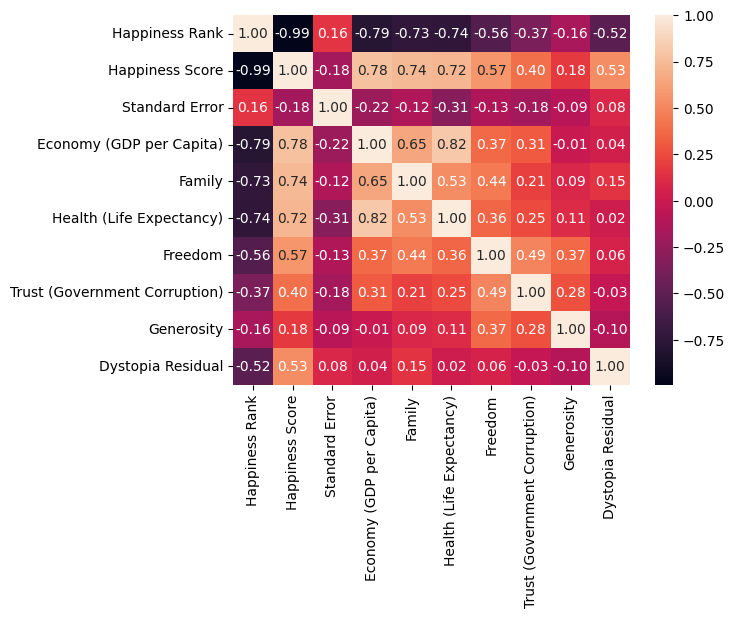

In [9]:
numeric_columns = dt_2015.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = dt_2015[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")

##### Loading 2016 dataset

Here you can see the preview of the 2016 data, as you can see this dataset has the columns, Country, Region, Happiness Rank, Happiness Score, Lower Confidence Interval, Upper Confidence Interval, Economy (GDP per Capita), Family, Health (Life Expectancy ), Freedom, Trust(Government Corruption), Generosity and finally Dystopia Residual

In [10]:
dt_2016 = pd.read_csv('../Data/2016.csv')
dt_2016.head(5)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


As you can see, the data set has a dimension (157,13), that is, 157 records/rows and 13 columns

In [11]:
dt_2016.shape

(157, 13)

As the following analysis we can see that the data set mostly contains numeric columns, either integers or floats. The Country column is of Object type, like the Region column, while the Happiness Rank column are of integer type and the rest of the columns are of float type.

In [12]:
dt_2016.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

Now, the number of null values ​​in the entire dataset was reviewed and as a result it was obtained that there were no null values

In [13]:
dt_2016.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Additionally, the existence of null values ​​was checked, however, there were no duplicate values.

In [14]:
dt_2016.duplicated().sum()

0

As the penultimate analysis, the unique values ​​of the region column were printed and later transferred to a continent

In [15]:
regions_2016 = dt_2016['Country'].unique()
print(regions_2016)

['Denmark' 'Switzerland' 'Iceland' 'Norway' 'Finland' 'Canada'
 'Netherlands' 'New Zealand' 'Australia' 'Sweden' 'Israel' 'Austria'
 'United States' 'Costa Rica' 'Puerto Rico' 'Germany' 'Brazil' 'Belgium'
 'Ireland' 'Luxembourg' 'Mexico' 'Singapore' 'United Kingdom' 'Chile'
 'Panama' 'Argentina' 'Czech Republic' 'United Arab Emirates' 'Uruguay'
 'Malta' 'Colombia' 'France' 'Thailand' 'Saudi Arabia' 'Taiwan' 'Qatar'
 'Spain' 'Algeria' 'Guatemala' 'Suriname' 'Kuwait' 'Bahrain'
 'Trinidad and Tobago' 'Venezuela' 'Slovakia' 'El Salvador' 'Malaysia'
 'Nicaragua' 'Uzbekistan' 'Italy' 'Ecuador' 'Belize' 'Japan' 'Kazakhstan'
 'Moldova' 'Russia' 'Poland' 'South Korea' 'Bolivia' 'Lithuania' 'Belarus'
 'North Cyprus' 'Slovenia' 'Peru' 'Turkmenistan' 'Mauritius' 'Libya'
 'Latvia' 'Cyprus' 'Paraguay' 'Romania' 'Estonia' 'Jamaica' 'Croatia'
 'Hong Kong' 'Somalia' 'Kosovo' 'Turkey' 'Indonesia' 'Jordan' 'Azerbaijan'
 'Philippines' 'China' 'Bhutan' 'Kyrgyzstan' 'Serbia'
 'Bosnia and Herzegovina' 'Monte

Finally, a correlation matrix was made to see the correlation of the variables with the happiness score column, where it could be observed that the factors most strongly associated with happiness are the economy (GDP per capita), health (life expectancy), and Family. Freedom and trust in government also have significant relationships with happiness, although to a lesser extent. Generosity shows a weaker relationship with happiness, suggesting that, in this context, it is not as determining a factor as the others. It should be noted that the factors Lower Confidencial Interval and High Confidencial Interval have a positive correlation of 1 which could generate overfitting.

<Axes: >

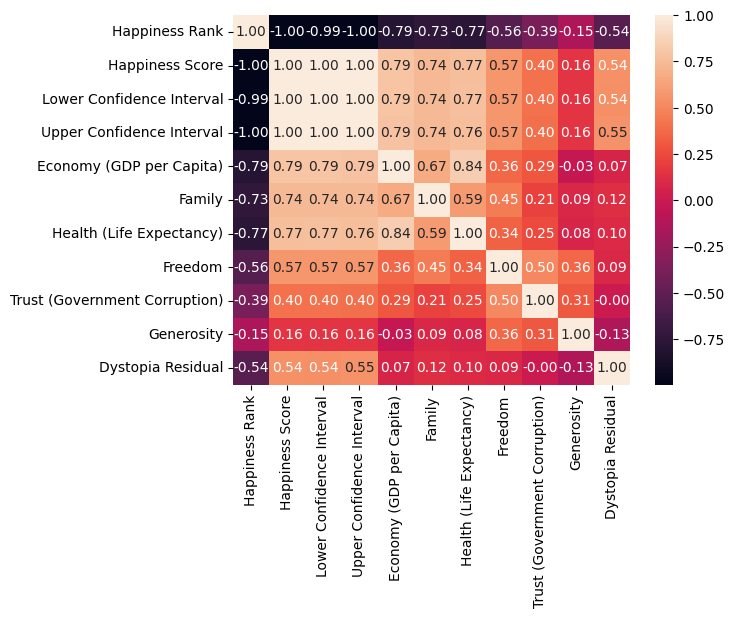

In [16]:
numeric_columns = dt_2016.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = dt_2016[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")

##### Loading 2017 dataset

Here you can see the preview of the 2017 data, as you can see this dataset has the columns, Country, Happiness Rank, Happiness Score, Whisker High, Whisker Low, Economy (GDP per Capita), Family, Health (Life Expectancy ), Freedom, Trust(Government Corruption), Generosity and finally Dystopia Residual

In [17]:
dt_2017 = pd.read_csv('../Data/2017.csv')
dt_2017.head(5)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


As you can see, the data set has a dimension (155,12), that is, 155 records/rows and 12 columns


In [18]:
dt_2017.shape

(155, 12)

As the following analysis we can see that the data set mostly contains numeric columns, either integers or floats. The Country column is of Object type, while the Happiness Rank column are of integer type and the rest of the columns are of float type.

In [19]:
dt_2017.dtypes

Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object

Now, the number of null values ​​in the entire dataset was reviewed and as a result it was obtained that there were no null values

In [20]:
dt_2017.isnull().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

Additionally, the existence of null values ​​was checked, however, there were no duplicate values.

In [21]:
dt_2017.duplicated().sum()

0

As the penultimate analysis, the unique values ​​of the region column were printed and later transferred to a continent

In [22]:
regions_2017 = dt_2017['Country'].unique()
print(regions_2017)

['Norway' 'Denmark' 'Iceland' 'Switzerland' 'Finland' 'Netherlands'
 'Canada' 'New Zealand' 'Sweden' 'Australia' 'Israel' 'Costa Rica'
 'Austria' 'United States' 'Ireland' 'Germany' 'Belgium' 'Luxembourg'
 'United Kingdom' 'Chile' 'United Arab Emirates' 'Brazil' 'Czech Republic'
 'Argentina' 'Mexico' 'Singapore' 'Malta' 'Uruguay' 'Guatemala' 'Panama'
 'France' 'Thailand' 'Taiwan Province of China' 'Spain' 'Qatar' 'Colombia'
 'Saudi Arabia' 'Trinidad and Tobago' 'Kuwait' 'Slovakia' 'Bahrain'
 'Malaysia' 'Nicaragua' 'Ecuador' 'El Salvador' 'Poland' 'Uzbekistan'
 'Italy' 'Russia' 'Belize' 'Japan' 'Lithuania' 'Algeria' 'Latvia'
 'South Korea' 'Moldova' 'Romania' 'Bolivia' 'Turkmenistan' 'Kazakhstan'
 'North Cyprus' 'Slovenia' 'Peru' 'Mauritius' 'Cyprus' 'Estonia' 'Belarus'
 'Libya' 'Turkey' 'Paraguay' 'Hong Kong S.A.R., China' 'Philippines'
 'Serbia' 'Jordan' 'Hungary' 'Jamaica' 'Croatia' 'Kosovo' 'China'
 'Pakistan' 'Indonesia' 'Venezuela' 'Montenegro' 'Morocco' 'Azerbaijan'
 'Dominican R

Finally, a correlation matrix was made where we can see that variables such as GDP per capita, family ties, life expectancy and the perception of freedom have a strong relationship with the happiness of the countries, while generosity has a smaller impact. Government corruption also moderately affects happiness.

<Axes: >

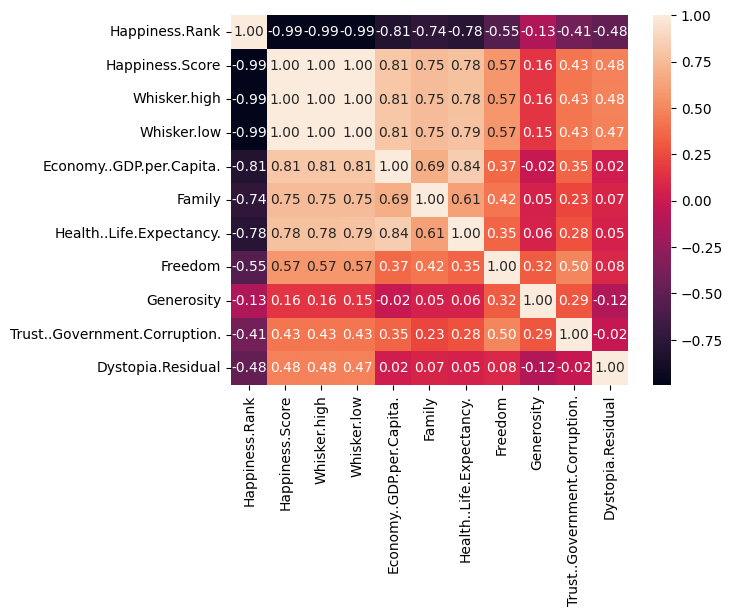

In [23]:
numeric_columns = dt_2017.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = dt_2017[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")

##### Loading 2018 dataset

Here you can see the preview of the 2018 data, as you can see this dataset has the columns, Overall Rank, Country or Region, Score (Happiness Score), GDP per Capita (Economy), Social Support, Health Life Expectancy , Freedom To Make Life Choices, Generosity, and finally Perceptions Of Corruption (Government Corruption)

In [24]:
dt_2018 = pd.read_csv('../Data/2018.csv')
dt_2018.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


As you can see, the data set has a dimension (156,9), that is, 156 records/rows and 9 columns

In [25]:
dt_2018.shape

(156, 9)

As the following analysis we can see that the data set mostly contains numeric columns, either integers or floats. The Country or region column is of Object type, while the Overall Rank column are of integer type and the rest of the columns are of float type.

In [26]:
dt_2018.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

Now, the number of null values ​​in the entire data set was checked and as a result it was found that there was 1 null value in the Perception of Corruption column.

In [27]:
dt_2018.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

Now the specific row where the null value is is searched.

In [28]:
dt_2018[dt_2018['Perceptions of corruption'].isnull()]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


Duplicate values ​​were searched in the data set but there were no null data

In [29]:
dt_2018.duplicated().sum()

0

As the penultimate analysis, the unique values ​​of the region column were printed and later transferred to a continent

In [30]:
regions_2018 = dt_2018['Country or region'].unique()
print(regions_2018)

['Finland' 'Norway' 'Denmark' 'Iceland' 'Switzerland' 'Netherlands'
 'Canada' 'New Zealand' 'Sweden' 'Australia' 'United Kingdom' 'Austria'
 'Costa Rica' 'Ireland' 'Germany' 'Belgium' 'Luxembourg' 'United States'
 'Israel' 'United Arab Emirates' 'Czech Republic' 'Malta' 'France'
 'Mexico' 'Chile' 'Taiwan' 'Panama' 'Brazil' 'Argentina' 'Guatemala'
 'Uruguay' 'Qatar' 'Saudi Arabia' 'Singapore' 'Malaysia' 'Spain'
 'Colombia' 'Trinidad & Tobago' 'Slovakia' 'El Salvador' 'Nicaragua'
 'Poland' 'Bahrain' 'Uzbekistan' 'Kuwait' 'Thailand' 'Italy' 'Ecuador'
 'Belize' 'Lithuania' 'Slovenia' 'Romania' 'Latvia' 'Japan' 'Mauritius'
 'Jamaica' 'South Korea' 'Northern Cyprus' 'Russia' 'Kazakhstan' 'Cyprus'
 'Bolivia' 'Estonia' 'Paraguay' 'Peru' 'Kosovo' 'Moldova' 'Turkmenistan'
 'Hungary' 'Libya' 'Philippines' 'Honduras' 'Belarus' 'Turkey' 'Pakistan'
 'Hong Kong' 'Portugal' 'Serbia' 'Greece' 'Lebanon' 'Montenegro' 'Croatia'
 'Dominican Republic' 'Algeria' 'Morocco' 'China' 'Azerbaijan'
 'Tajikistan' '

Finally, a correlation matrix was made where we can see that variables such as GDP per capita, social support, healthy life expectancy and freedom to make decisions are strongly related to happiness. Generosity has a minor impact, while perceptions of corruption also play a moderate role in happiness.

<Axes: >

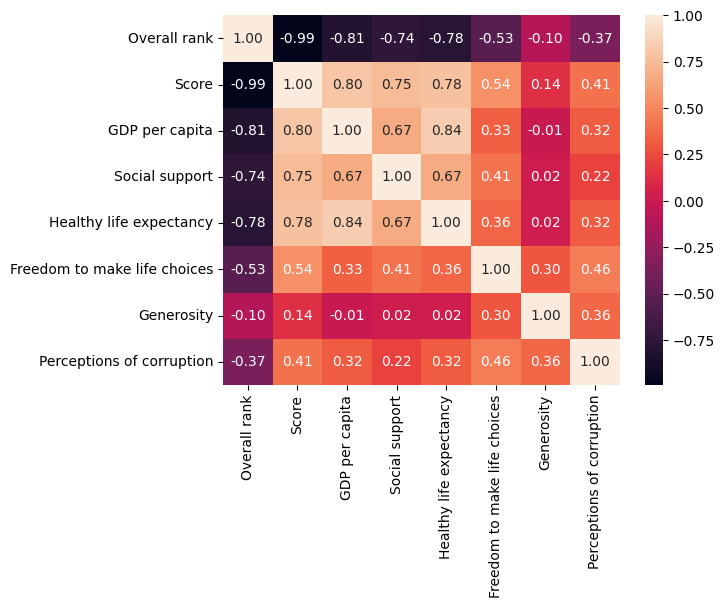

In [31]:
numeric_columns = dt_2018.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = dt_2018[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")

##### Loading 2019 dataset

Here you can see the preview of the 2019 data, as you can see this dataset has the columns, Overall Rank, Country or Region, Score (Happiness Score), GDP per Capita (Economy), Social Support, Health Life Expectancy , Freedom To Make Life Choices, Generosity, and finally Perceptions Of Corruption (Government Corruption)

In [32]:
dt_2019 = pd.read_csv('../Data/2019.csv')
dt_2019.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


As you can see, this data set has the same number of rows and columns as the previous data set.

In [33]:
dt_2019.shape

(156, 9)

As the following analysis we can see that the data set mostly contains numeric columns, either integers or floats. The Country or region column is of Object type, while the Overall Rank column are of integer type and the rest of the columns are of float type.

In [34]:
dt_2019.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

Now, the number of null values ​​in the entire dataset was reviewed and as a result it was obtained that there were no null values

In [35]:
dt_2019.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

Duplicate values ​​were searched in the data set but there were no null data

In [36]:
dt_2019.duplicated().sum()

0

As the penultimate analysis, the unique values ​​of the region column were printed and later transferred to a continent

In [37]:
regions_2019 = dt_2019['Country or region'].unique()
print(regions_2019)

['Finland' 'Denmark' 'Norway' 'Iceland' 'Netherlands' 'Switzerland'
 'Sweden' 'New Zealand' 'Canada' 'Austria' 'Australia' 'Costa Rica'
 'Israel' 'Luxembourg' 'United Kingdom' 'Ireland' 'Germany' 'Belgium'
 'United States' 'Czech Republic' 'United Arab Emirates' 'Malta' 'Mexico'
 'France' 'Taiwan' 'Chile' 'Guatemala' 'Saudi Arabia' 'Qatar' 'Spain'
 'Panama' 'Brazil' 'Uruguay' 'Singapore' 'El Salvador' 'Italy' 'Bahrain'
 'Slovakia' 'Trinidad & Tobago' 'Poland' 'Uzbekistan' 'Lithuania'
 'Colombia' 'Slovenia' 'Nicaragua' 'Kosovo' 'Argentina' 'Romania' 'Cyprus'
 'Ecuador' 'Kuwait' 'Thailand' 'Latvia' 'South Korea' 'Estonia' 'Jamaica'
 'Mauritius' 'Japan' 'Honduras' 'Kazakhstan' 'Bolivia' 'Hungary'
 'Paraguay' 'Northern Cyprus' 'Peru' 'Portugal' 'Pakistan' 'Russia'
 'Philippines' 'Serbia' 'Moldova' 'Libya' 'Montenegro' 'Tajikistan'
 'Croatia' 'Hong Kong' 'Dominican Republic' 'Bosnia and Herzegovina'
 'Turkey' 'Malaysia' 'Belarus' 'Greece' 'Mongolia' 'North Macedonia'
 'Nigeria' 'Kyrgyzstan'

Finally, a correlation matrix was made where we can see that Variables such as GDP per capita, social support, healthy life expectancy and freedom to make decisions are strongly related to happiness. Generosity has a minor impact, while perceptions of corruption also play a moderate role in happiness. The relationships between the variables highlight the interconnection between the different factors that contribute to the happiness of a country.

<Axes: >

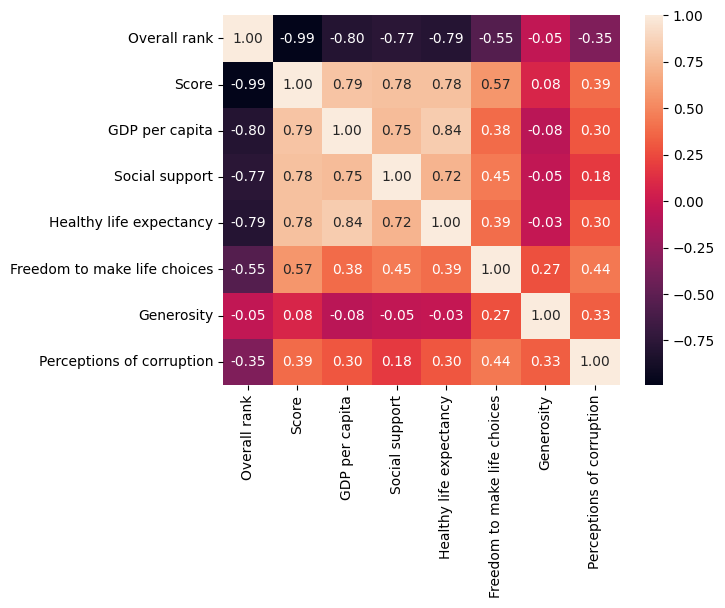

In [38]:
numeric_columns = dt_2019.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = dt_2019[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")

### Feature Selection

In this section, the selection of features was made based on a study carried out by the UNAM (National Autonomous University of Mexico) where they explained and proposed the variables to predict the happiness of a country. It should be noted that the Country and Year columns were added to also predict them along with the previously selected ones:

The features were:

- Country
- Happiness Score
- GDP Per Capita
- Social Support
- Healthy Life Expectancy
- Freedom
- Government Corruption Perception
- Generosity
- Year

Additionally, functions were applied to these columns to rename and standardize them to be able to concatenate them.


In [39]:
dt_2015 = rename_15_16_columns(dt_2015, 2015)
dt_2015.head(5)


,Country,Happiness_Score,GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom,Government_Corruption_Perception,Generosity,Year
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [40]:
dt_2016 = rename_15_16_columns(dt_2016, 2016)
dt_2016.head(5)

,Country,Happiness_Score,GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom,Government_Corruption_Perception,Generosity,Year
0,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2016
1,Switzerland,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2016
2,Iceland,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2016
3,Norway,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2016
4,Finland,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2016


In [41]:
dt_2017 = rename_17_columns(dt_2017,2017)
dt_2017.head(5)

,Country,Happiness_Score,GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom,Government_Corruption_Perception,Generosity,Year
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,2017
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280,2017
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540,2017
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549,2017
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483,2017


In [42]:
dt_2018 = rename_18_19_columns(dt_2018,2018)
dt_2018.head(5)

,Country,Happiness_Score,GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom,Government_Corruption_Perception,Generosity,Year
0,Finland,7.632,1.305,1.592,0.874,0.681,0.393,0.202,2018
1,Norway,7.594,1.456,1.582,0.861,0.686,0.340,0.286,2018
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.408,0.284,2018
3,Iceland,7.495,1.343,1.644,0.914,0.677,0.138,0.353,2018
4,Switzerland,7.487,1.420,1.549,0.927,0.660,0.357,0.256,2018


In [43]:
dt_2019 = rename_18_19_columns(dt_2019,2019)
dt_2019.head(5)

,Country,Happiness_Score,GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom,Government_Corruption_Perception,Generosity,Year
0,Finland,7.769,1.340,1.587,0.986,0.596,0.393,0.153,2019
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.410,0.252,2019
2,Norway,7.554,1.488,1.582,1.028,0.603,0.341,0.271,2019
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.118,0.354,2019
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.298,0.322,2019


Once the features were selected and standardized with the same name, the data sets could be concatenated

In [44]:
World_Happiness = pd.concat([dt_2015,dt_2016, dt_2017, dt_2018, dt_2019], ignore_index=True)
World_Happiness.head(5)

,Country,Happiness_Score,GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom,Government_Corruption_Perception,Generosity,Year
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


The data set was now searched for null values ​​once the concatenation was performed

In [45]:
World_Happiness.isnull().sum()

Country                             0
Happiness_Score                     0
GDP_Per_Capita                      0
Social_Support                      0
Healthy_Life_Expectancy             0
Freedom                             0
Government_Corruption_Perception    1
Generosity                          0
Year                                0
dtype: int64


Likewise for duplicate values, even though there were no duplicate values

In [46]:
World_Happiness.duplicated().sum()

0

The null value that was there was removed

In [47]:
World_Happiness = World_Happiness.dropna()

And it was verified that there were no more null values ​​left.

In [48]:
World_Happiness.isnull().sum()

Country                             0
Happiness_Score                     0
GDP_Per_Capita                      0
Social_Support                      0
Healthy_Life_Expectancy             0
Freedom                             0
Government_Corruption_Perception    0
Generosity                          0
Year                                0
dtype: int64


Now, I added a new column called continent, where I assigned the continent corresponding to each country

In [49]:
World_Happiness['Continent'] = World_Happiness['Country'].apply(get_continent)
World_Happiness.head(5)

,Country,Happiness_Score,GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom,Government_Corruption_Perception,Generosity,Year,Continent
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,Europe
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,Europe
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,Europe
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,Europe
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,North America


It was verified that the unique values ​​in the column were 6 (Oceania, South America, North America, Europe, Asia, Africa)

In [50]:
World_Happiness['Continent'].unique()

array(['Europe', 'North America', 'Oceania', 'Asia', 'South America',
       'Africa'], dtype=object)

In addition, the number of countries that each continent had

In [51]:
#Contar cuantos paises hay por continente
World_Happiness['Continent'].value_counts()

Continent
Africa           221
Asia             219
Europe           210
North America     69
South America     52
Oceania           10
Name: count, dtype: int64

Once I verified that the conversion to the continents was done correctly, I took out dummy columns for each continent (Continent_Africa, Continent_Oceania, Continent_South_America, Continent_North_America, Continent_Asia, Continent_Europe)

In [52]:
World_Happiness = get_continent_dummies(World_Happiness)
World_Happiness.head(5)

,Country,Happiness_Score,GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom,Government_Corruption_Perception,Generosity,Year,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,False,False,True,False,False,False
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,False,False,True,False,False,False
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,False,False,True,False,False,False
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,False,False,True,False,False,False
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,False,False,False,True,False,False


Since each column was of type boolean (True or False), I decided to convert them to integers (0 and 1)

In [53]:
World_Happiness = World_Happiness.astype({'Continent_Africa':'int','Continent_Asia': 'int', 'Continent_Europe': 'int', 'Continent_North America': 'int', 'Continent_Oceania': 'int', 'Continent_South America': 'int'})
World_Happiness.head(5)

,Country,Happiness_Score,GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom,Government_Corruption_Perception,Generosity,Year,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,0,0,1,0,0,0
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,0,0,1,0,0,0
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,0,0,1,0,0,0
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,0,0,1,0,0,0
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,0,0,0,1,0,0


I verified that the dummy columns for each continent had the same number of values ​​before passing them to dummies and sure enough, they had the same number

In [54]:
count_africa = World_Happiness['Continent_Africa'].value_counts()[1]
count_asia = World_Happiness['Continent_Asia'].value_counts()[1]
count_europe = World_Happiness['Continent_Europe'].value_counts()[1]
count_north_america = World_Happiness['Continent_North America'].value_counts()[1]
count_oceania = World_Happiness['Continent_Oceania'].value_counts()[1]
count_south_america = World_Happiness['Continent_South America'].value_counts()[1]

print(count_africa, count_asia, count_europe, count_north_america, count_south_america, count_oceania)


221 219 210 69 52 10


In [55]:
data = dict(type='choropleth',
            locations = World_Happiness['Country'],
            locationmode = 'country names',
            z = World_Happiness['Happiness_Score'],
            text = World_Happiness['Country'],
            colorbar = {'title':'Happiness Score'},
            colorscale = 'Viridis',
            reversescale = True)

layout = dict(title='Global Happiness Score',
                geo=dict(showframe=False,projection={'type':'natural earth'}))

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)


Once the conversion of the countries to continents was done, the country column was eliminated since it would not be used

In [56]:
World_Happiness = delete_columns(World_Happiness)
World_Happiness.head(5)

,Happiness_Score,GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom,Government_Corruption_Perception,Generosity,Year,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,0,0,1,0,0,0
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,0,0,1,0,0,0
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,0,0,1,0,0,0
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,0,0,1,0,0,0
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,0,0,0,1,0,0


Finally, the dummy columns were renamed since the one for south america had been left as (Continent_South America) as well as north america (Continent_North America) and they were renamed to (Continent_South_America and Continent_North_America) respectively.

In [57]:
World_Happiness = rename_america(World_Happiness)
World_Happiness.head(5)

,Happiness_Score,GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom,Government_Corruption_Perception,Generosity,Year,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North_America,Continent_Oceania,Continent_South_America
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,0,0,1,0,0,0
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,0,0,1,0,0,0
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,0,0,1,0,0,0
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,0,0,1,0,0,0
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,0,0,0,1,0,0


#### Machine Learning Model

In this section, machine learning models were tested to see which one could best predict happiness in the world. Initially a linear regression model was tested and later a Random Forest model.

#### Set Train and Test Split

In [58]:
X = World_Happiness.drop('Happiness_Score', axis = 1)
y = World_Happiness['Happiness_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29)

#### Linear Regression Model

In [59]:
LinearRegressionModel2 = LinearRegression()

LinearRegressionModel2.fit(X_train, y_train)

y_pred_2 = LinearRegressionModel2.predict(X_test)

mse = mean_squared_error(y_test, y_pred_2)
r2 = r2_score(y_test, y_pred_2)

print('Results for Linear Regression Model:')
print('Mean Squared Error:', mse)
print('R2 Score:', r2)


Results for Linear Regression Model:
Mean Squared Error: 0.2422642666542278
R2 Score: 0.8157405816217267


#### Random Forest Regressor Model

In [60]:
RandomForestRegressorModel2 = RandomForestRegressor(n_estimators=100, random_state=29)

RandomForestRegressorModel2.fit(X_train, y_train)

y_pred_2_rf = RandomForestRegressorModel2.predict(X_test)

mse = mean_squared_error(y_test, y_pred_2_rf)
r2 = r2_score(y_test, y_pred_2_rf)

print('Results for Random Forest Regressor Model:')
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Results for Random Forest Regressor Model:
Mean Squared Error: 0.19122160721721967
R2 Score: 0.8545621993131498


#### Save the model

Once the models were tested, I decided to choose the Random Forest since it was the one that obtained the best results and save it in the Model folder

In [61]:
joblib_file = "../Model/rforest_regressor.pkl"
joblib.dump(RandomForestRegressorModel2, joblib_file)

['../Model/rforest_regressor.pkl']